In [1]:
from patchedimage import PatchedImage
from utilities import *

In [4]:
imgp = PatchedImage("images/bois.tif",5)
masque = masque_carre((100,70),(220,140),imgp.img.shape)
imgp.set_masque(masque,leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Cannot infer the type of variable '$378build_list.3' (temporary variable), have imprecise type: list(undefined)<iv=None>. 

For Numba to be able to compile a list, the list must have a known and
precise type that can be inferred from the other variables. Whilst sometimes
the type of empty lists can be inferred, this is not always the case, see this
documentation for help:

https://numba.readthedocs.io/en/stable/user/troubleshoot.html#my-code-has-an-untyped-list-problem


File "utilities.py", line 64:
def mean_valid_gradient_compiled(i, j, grad_y, grad_x, height, width):
    <source elided>
        # Calculate the mean of valid gradients for each axis
    if valid_gradients_y == [] or valid_gradients_x == []:
    ^


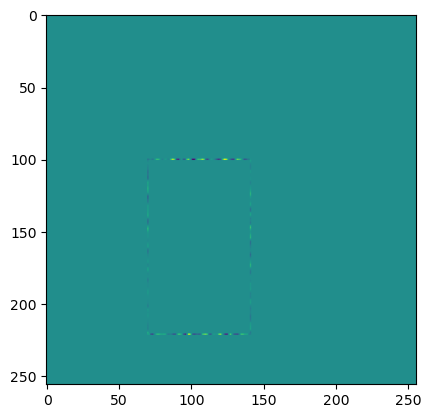

In [10]:
plt.imshow(imgp.priority)

In [11]:
for i in range(200):
    try:
        i,j = imgp.find_max_priority()
    except ValueError:
        break
    imgp.reconstruction((i,j))
    imgp.set_priorities()

/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jean/miniconda3/envs/jean/lib/python3.12/site-packages/numpy/core/_methods.

106 113


ValueError: Erreur sur la frontiere

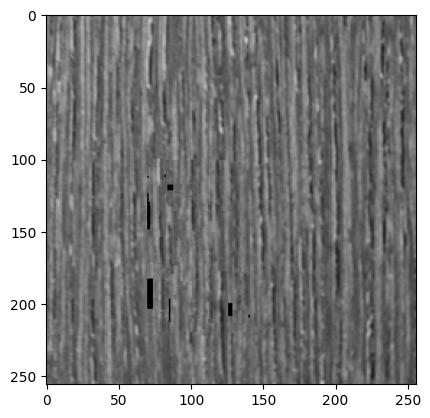

In [13]:
imgp.show_img()